<a href="https://colab.research.google.com/github/Oleksii-Adamov/text-detection-recognition-project/blob/main/Kirill_notebooks/train_and_test_deep_text_recognition_benchmark_for_easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This can be executed in https://colab.research.google.com "Python 3 / GPU" runtime.

In [ ]:
!git clone https://github.com/clovaai/deep-text-recognition-benchmark
%cd deep-text-recognition-benchmark

Cloning into 'deep-text-recognition-benchmark'...
remote: Enumerating objects: 495, done.
remote: Total 495 (delta 0), reused 0 (delta 0), pack-reused 495
Receiving objects: 100% (495/495), 3.07 MiB | 22.92 MiB/s, done.
Resolving deltas: 100% (302/302), done.
/content/deep-text-recognition-benchmark


Next, download large model files from Google Drive, using hack: https://stackoverflow.com/questions/20665881/direct-download-from-google-drive-using-google-drive-api/32742700#32742700

In [ ]:
models = {
    'None-ResNet-None-CTC.pth': 'https://drive.google.com/open?id=1FocnxQzFBIjDT2F9BkNUiLdo1cC3eaO0',
    'None-VGG-BiLSTM-CTC.pth': 'https://drive.google.com/open?id=1GGC2IRYEMQviZhqQpbtpeTgHO_IXWetG',
    'None-VGG-None-CTC.pth': 'https://drive.google.com/open?id=1FS3aZevvLiGF1PFBm5SkwvVcgI6hJWL9',
    'TPS-ResNet-BiLSTM-Attn-case-sensitive.pth': 'https://drive.google.com/open?id=1ajONZOgiG9pEYsQ-eBmgkVbMDuHgPCaY',
    'TPS-ResNet-BiLSTM-Attn.pth': 'https://drive.google.com/open?id=1b59rXuGGmKne1AuHnkgDzoYgKeETNMv9',
    'TPS-ResNet-BiLSTM-CTC.pth': 'https://drive.google.com/open?id=1FocnxQzFBIjDT2F9BkNUiLdo1cC3eaO0',
}

In [ ]:
output = !CUDA_VISIBLE_DEVICES=0 python3 demo.py \
--Transformation None --FeatureExtraction VGG --SequenceModeling BiLSTM --Prediction CTC \
--image_folder demo_image/hell/ \
--character абвгдеёжзийклмнопрстуфхцчшщъыьэюя \
--saved_model saved_models/None-VGG-BiLSTM-CTC-Seed1111/best_accuracy.pth

In [ ]:
output2 = !CUDA_VISIBLE_DEVICES=0 python3 train.py --train_data kkk --valid_data kkk --select_data / --batch_ratio 1 --Transformation None --num_iter 14000 --batch_max_length 100 --character абвгдеёжзийклмнопрстуфхцчшщъыьэюя --FeatureExtraction VGG --SequenceModeling BiLSTM --Prediction CTC

In [ ]:
print(output2)

['Filtering the images containing characters which are not in opt.character', 'Filtering the images whose label is longer than opt.batch_max_length', '--------------------------------------------------------------------------------', 'dataset_root: sss', "opt.select_data: ['/']", "opt.batch_ratio: ['1']", '--------------------------------------------------------------------------------', 'dataset_root:    sss\t dataset: /', 'Traceback (most recent call last):', '  File "train.py", line 317, in <module>', '    train(opt)', '  File "train.py", line 31, in train', '    train_dataset = Batch_Balanced_Dataset(opt)', '  File "/content/deep-text-recognition-benchmark/dataset.py", line 42, in __init__', '    _dataset, _dataset_log = hierarchical_dataset(root=opt.train_data, opt=opt, select_data=[selected_d])', '  File "/content/deep-text-recognition-benchmark/dataset.py", line 124, in hierarchical_dataset', '    concatenated_dataset = ConcatDataset(dataset_list)', '  File "/usr/local/lib/pytho

,img,id,label,conf
0,,demo_image/hell/2.jpg,гикилишлилььиь,0.0002
1,,demo_image/hell/161.jpg,мозгом,0.8759
2,,demo_image/hell/Screenshot 2022-08-24 at 12.48.46.png,м,0.7117
3,,demo_image/hell/Screenshot 2022-08-24 at 12.51.12.png,зликилх,0.0557

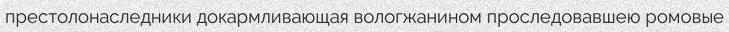
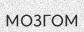
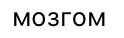
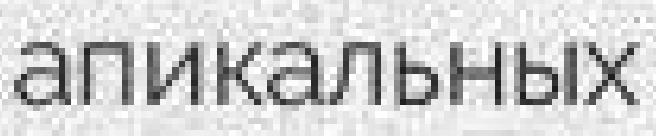

In [ ]:
from IPython.core.display import display, HTML
from PIL import Image
import base64
import io
import pandas as pd

data = pd.DataFrame()
for ind, row in enumerate(output[output.index('image_path               \tpredicted_labels         \tconfidence score')+2:]):
  row = row.split('\t')
  filename = row[0].strip()
  label = row[1].strip()
  conf = row[2].strip()
  img = Image.open(filename)
  img_buffer = io.BytesIO()
  img.save(img_buffer, format="PNG")
  imgStr = base64.b64encode(img_buffer.getvalue()).decode("utf-8") 

  data.loc[ind, 'img'] = '<img src="data:image/png;base64,{0:s}">'.format(imgStr)
  data.loc[ind, 'id'] = filename
  data.loc[ind, 'label'] = label
  data.loc[ind, 'conf'] = conf

html_all = data.to_html(escape=False)
display(HTML(html_all))